In [1]:
from e3nn import o3
import torch

c:\Users\HuTia\Documents\Coding\venv\MachineLearning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from e3nn.o3 import Irreps
irreps = Irreps("1o")


In [4]:
tp = o3.FullTensorProduct("1o", "1o", ["1e"])
tp2 = o3.FullTensorProduct("1e", "1o", ["1o"])
tp, tp2

(FullTensorProduct(1x1o x 1x1o -> 1x1e | 1 paths | 0 weights),
 FullTensorProduct(1x1e x 1x1o -> 1x1o | 1 paths | 0 weights))

c:\Users\HuTia\Documents\Coding\venv\MachineLearning\lib\site-packages\torch\jit\_check.py:181: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn("The TorchScript type system doesn't support "


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

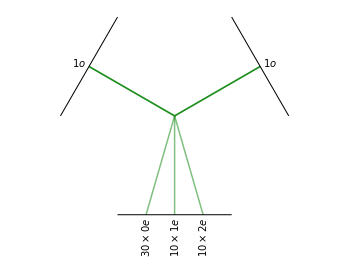

In [4]:
from e3nn.o3 import FullyConnectedTensorProduct
tp = FullyConnectedTensorProduct(
    "1o", "1o", "30x0e+10x1e+10x2e",
    internal_weights=False,
)
tp.visualize()

5x2o+5x1o

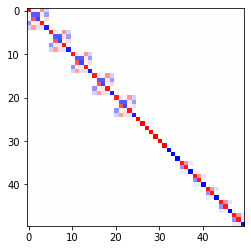

In [8]:
irreps = Irreps("5x2o + 7x0e + 3x0o + 5x1o")
from e3nn import o3
rot = -o3.rand_matrix()

D = irreps.D_from_matrix(rot)

import matplotlib.pyplot as plt
plt.imshow(D, cmap='bwr', vmin=-1, vmax=1)


Irreps("5x2o") + Irreps("5x1o")

1x0e+1x1e+1x2e


c:\Users\HuTia\Documents\Coding\venv\MachineLearning\lib\site-packages\torch\jit\_check.py:181: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn("The TorchScript type system doesn't support "


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

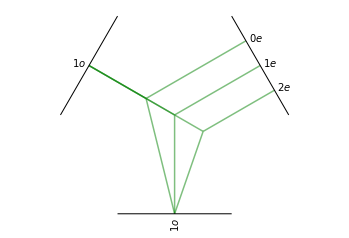

In [14]:
from e3nn.o3 import FullyConnectedTensorProduct, FullTensorProduct
irreps_node = o3.Irreps("1o")
tp = FullTensorProduct(
    irreps_node,
    irreps_node,
    # o3.Irreps("1e"),
    # internal_weights=False,
    shared_weights=False
)
# tp.visualize(), tp.irreps_out

print(tp.irreps_out)
tp2 = FullyConnectedTensorProduct(
    irreps_node,
    tp.irreps_out,
    o3.Irreps("1o"),
    shared_weights=False
)
tp2.visualize()

In [3]:
Fxi = torch.rand(3)
Fxj = torch.rand(3)

def MLP(Fxi, Fxj):
    y_temp = o3.FullTensorProduct("1o", "1o", ["1e"])(Fxi, Fxj)
    y = o3.FullTensorProduct("1e", "1o", ["1o"])(y_temp, Fxj)
    return y
    
Fmij = MLP(Fxi, Fxj)
Fxi, Fmij

(tensor([0.0699, 0.6820, 0.2347]), tensor([ 0.0054, -0.0101,  0.0117]))

In [13]:
g = o3.Irreps("1o")
angles = o3.rand_angles()
Q = g.D_from_angles(*angles)
angles, Q

((tensor(3.1887), tensor(1.2172), tensor(3.2999)),
 tensor([[ 0.9838, -0.0442,  0.1735],
         [-0.1479,  0.3463,  0.9264],
         [-0.1010, -0.9371,  0.3342]]))

In [13]:
# random input
Fxi = torch.rand(3)
Fxj = torch.rand(3)

# random Q
g = o3.Irreps("1o")
angles = o3.rand_angles()
Q = g.D_from_angles(*angles)


rotate_first = MLP(torch.matmul(Q, Fxi), torch.matmul(Q, Fxj))
rotate_second = torch.matmul(Q, MLP(Fxi, Fxj))

rotate_first, rotate_second, (rotate_first - rotate_second).abs().max()
# QFmij = MLP(QFxi, QFxj)


(tensor([-0.0158,  0.0333, -0.1347]),
 tensor([-0.0158,  0.0333, -0.1347]),
 tensor(5.9605e-08))

In [35]:
import torch
a = torch.arange(6.).reshape(2, 3)
b = torch.arange(6.).reshape(2, 3) + 1
res = torch.kron(a, b).reshape(4, 3, 3) # , dims=([1, 0], [0, 1])

torch.einsum('ni,mj->nmij', a, b).view(a.shape[0] * b.shape[0], a.shape[1], b.shape[1])

tensor([[[ 0.,  0.,  0.],
         [ 1.,  2.,  3.],
         [ 2.,  4.,  6.]],

        [[ 0.,  0.,  0.],
         [ 4.,  5.,  6.],
         [ 8., 10., 12.]],

        [[ 3.,  6.,  9.],
         [ 4.,  8., 12.],
         [ 5., 10., 15.]],

        [[12., 15., 18.],
         [16., 20., 24.],
         [20., 25., 30.]]])

In [34]:
torch.rand(4)

tensor([0.6491, 0.4531, 0.7535, 0.0649])

In [6]:
import torch
from e3nn.nn.models.v2103.gate_points_networks import SimpleNetwork

net = SimpleNetwork(
    irreps_in="1x1o + 1x1o",
    irreps_out="1x1o",
    max_radius=2.0,
    num_neighbors=3.0,
    num_nodes=5.0
)
print(net)

c:\Users\HuTia\Documents\Coding\venv\MachineLearning\lib\site-packages\torch\jit\_check.py:181: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn("The TorchScript type system doesn't support "


SimpleNetwork(
  (mp): MessagePassing(
    (layers): ModuleList(
      (0): Compose(
        (first): Convolution(
          (sc): FullyConnectedTensorProduct(2x1o x 1x0e -> 250x0e+50x1o+50x1e+50x2o+50x2e | 100 paths | 100 weights)
          (lin1): FullyConnectedTensorProduct(2x1o x 1x0e -> 2x1o | 4 paths | 4 weights)
          (fc): FullyConnectedNet[10, 100, 12]
          (tp): TensorProduct(2x1o x 1x0e+1x1o+1x2e -> 2x0e+4x1o+2x1e+2x2o+2x2e | 12 paths | 12 weights)
          (lin2): FullyConnectedTensorProduct(2x0e+4x1o+2x1e+2x2o+2x2e x 1x0e -> 250x0e+50x1o+50x1e+50x2o+50x2e | 1000 paths | 1000 weights)
          (lin3): FullyConnectedTensorProduct(2x0e+4x1o+2x1e+2x2o+2x2e x 1x0e -> 1x0e | 2 paths | 2 weights)
        )
        (second): Gate (250x0e+50x1o+50x1e+50x2o+50x2e -> 50x0e+50x1o+50x1e+50x2o+50x2e)
      )
      (1): Compose(
        (first): Convolution(
          (sc): FullyConnectedTensorProduct(50x0e+50x1o+50x1e+50x2o+50x2e x 1x0e -> 50x0o+250x0e+50x1o+50x1e+50x2o+50x2e

KeyError: 'lin3'

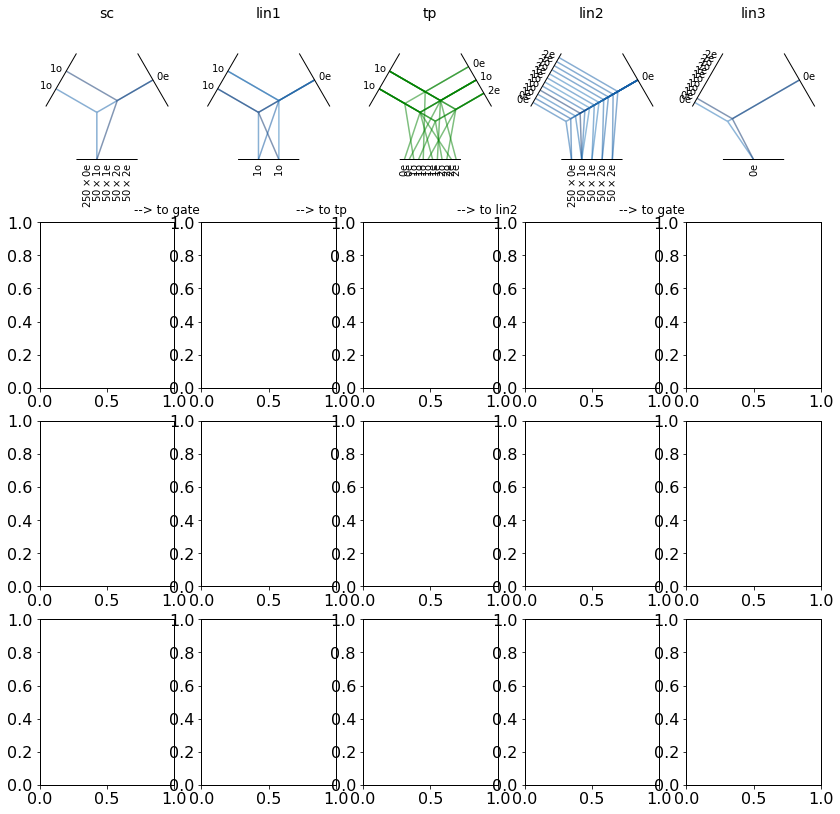

In [7]:
visualize_layers(net)

In [4]:
irreps_node_hidden = o3.Irreps([(10, (l, p)) for l in range(2 + 1) for p in [-1, 1]])
irreps_node_hidden

10x0o+10x0e+10x1o+10x1e+10x2o+10x2e